<a href="https://colab.research.google.com/github/Renni-W/Crude-Oil-Deep-Learning-Predictions/blob/main/ANN_Crude_oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# Load the dataset
df = pd.read_csv('merged_data1.csv')

# We'll predict 'CRD_CLOSE' using 'CRD_HIGH', 'CRD_LOW', 'FX_Price', 'FX_Open', and 'G_USD' as features.
features = ['CRD_HIGH', 'CRD_LOW', 'FX_Price', 'FX_Open', 'G_USD']
target = ['CRD_CLOSE']

# Splitting the data into features (X) and target (y)
X = df[features].values
y = df[target].values

# Normalizing the features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [ ]:
# Splitting the data into training and testing sets
train_size = int(len(X_scaled) * 0.70)
test_size = len(X_scaled) - train_size
trainX, testX = X_scaled[0:train_size,:], X_scaled[train_size:len(X_scaled),:]
trainY, testY = y_scaled[0:train_size], y_scaled[train_size:len(y_scaled)]

In [ ]:
# Creatig a simple Sequential ANN model
model = Sequential()
model.add(Dense(12, input_dim=len(features), activation='relu'))  # Input layer
model.add(Dense(8, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
#Training my model
history = model.fit(trainX, trainY, epochs=50, batch_size=2,validation_data=(testX, testY), verbose = 2)

Epoch 1/50
2810/2810 - 7s - loss: 0.0074 - val_loss: 0.0192 - 7s/epoch - 2ms/step
Epoch 2/50
2810/2810 - 7s - loss: 1.5273e-04 - val_loss: 8.1393e-04 - 7s/epoch - 3ms/step
Epoch 3/50
2810/2810 - 6s - loss: 1.4198e-06 - val_loss: 0.0022 - 6s/epoch - 2ms/step
Epoch 4/50
2810/2810 - 8s - loss: 3.9873e-07 - val_loss: 0.0021 - 8s/epoch - 3ms/step
Epoch 5/50
2810/2810 - 5s - loss: 1.0278e-06 - val_loss: 0.0022 - 5s/epoch - 2ms/step
Epoch 6/50
2810/2810 - 7s - loss: 1.3344e-06 - val_loss: 0.0019 - 7s/epoch - 2ms/step
Epoch 7/50
2810/2810 - 5s - loss: 5.4944e-07 - val_loss: 0.0023 - 5s/epoch - 2ms/step
Epoch 8/50
2810/2810 - 5s - loss: 9.3080e-07 - val_loss: 0.0021 - 5s/epoch - 2ms/step
Epoch 9/50
2810/2810 - 7s - loss: 1.8562e-06 - val_loss: 0.0021 - 7s/epoch - 3ms/step
Epoch 10/50
2810/2810 - 6s - loss: 6.0135e-07 - val_loss: 0.0017 - 6s/epoch - 2ms/step
Epoch 11/50
2810/2810 - 6s - loss: 4.6649e-07 - val_loss: 0.0019 - 6s/epoch - 2ms/step
Epoch 12/50
2810/2810 - 6s - loss: 9.4961e-07 - val_

In [ ]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

76/76 [==============================] - 0s 2ms/step


In [ ]:
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

In [ ]:

aa = pd.DataFrame(list(zip(testPredict, testY)), columns=["Predict","Y"])
aa

,Predict,Y
0,[108.9818],[109.1]
1,[109.35889],[109.4]
2,[108.49301],[108.525]
3,[108.76995],[108.825]
4,[111.258415],[111.305]
...,...,...
2404,[100.65247],[92.395]
2405,[100.170746],[92.02]
2406,[101.50997],[93.6]
2407,[101.17985],[93.385]


In [ ]:
k = df.iloc[-2393:len(df)-1,:2]

k.reset_index(drop=True, inplace=True)
aa = aa.iloc[-2393:len(aa)-1,:2]
aa.reset_index(drop=True, inplace=True)
#aa["Predict"] = aa["Predict"].str.strip("[]")
aa["Predict"] = aa["Predict"].apply(lambda x: str(x).strip('[]'))
#aa["Predict"] = pd.to_numeric(aa["Predict"])
newcon = pd.concat([k, aa["Predict"]], axis = 1)
newcon.to_csv("ANNPredict.csv")
newcon

,Date,CRD_CLOSE,Predict
0,3/20/2014,106.050,106.0617
1,3/21/2014,105.715,105.699196
2,3/24/2014,107.285,107.20901
3,3/25/2014,106.655,106.59983
4,3/26/2014,107.020,106.90943
...,...,...,...
2387,9/8/2023,91.900,100.3724
2388,9/11/2023,92.395,100.65247
2389,9/12/2023,92.020,100.170746
2390,9/13/2023,93.600,101.50997


In [ ]:
# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print(f'Train Score: {trainScore:.2f} RMSE')
testScore = np.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print(f'Test Score: {testScore:.2f} RMSE')

Train Score: 0.08 RMSE
Test Score: 6.06 RMSE


In [ ]:
 mse = mean_squared_error(testY[:,0], testPredict[:,0])
mae = mean_absolute_error(testY[:,0], testPredict[:,0])
r2 = r2_score(testY[:,0], testPredict[:,0])
print([mse,mae, r2])

[36.753032848593364, 4.485441764999395, 0.9220312901115632]


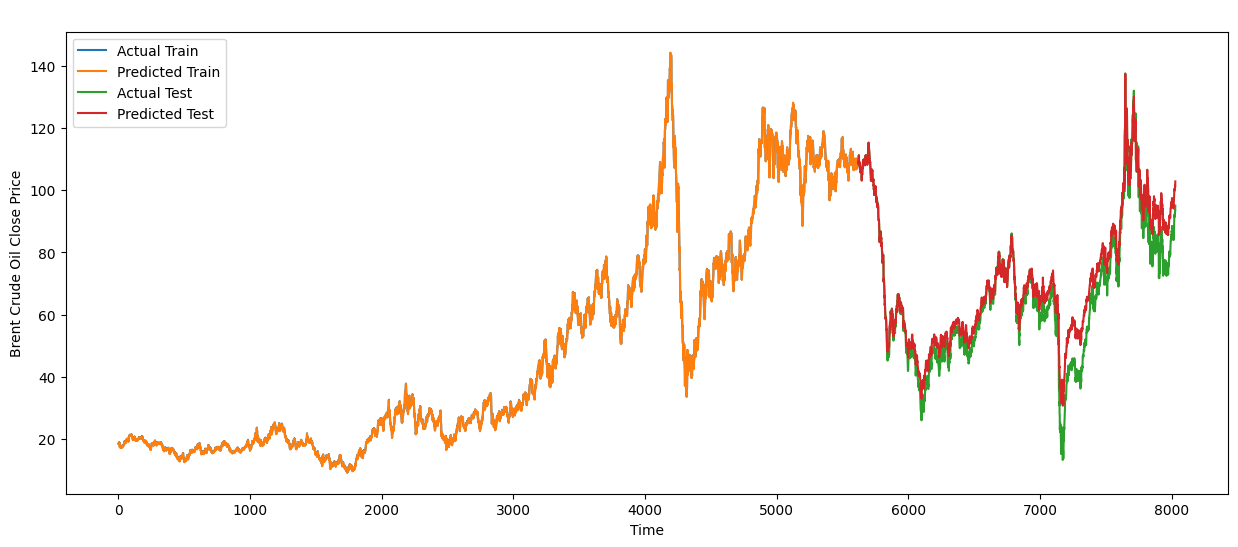

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(trainY, label='Actual Train')
plt.plot(trainPredict, label='Predicted Train')
plt.plot(range(len(trainY), len(trainY) + len(testY)), testY, label='Actual Test')
plt.plot(range(len(trainPredict), len(trainPredict) + len(testPredict)), testPredict, label='Predicted Test')
plt.title(' ')
plt.xlabel('Time')
plt.ylabel('Brent Crude Oil Close Price')
plt.legend()
plt.show()

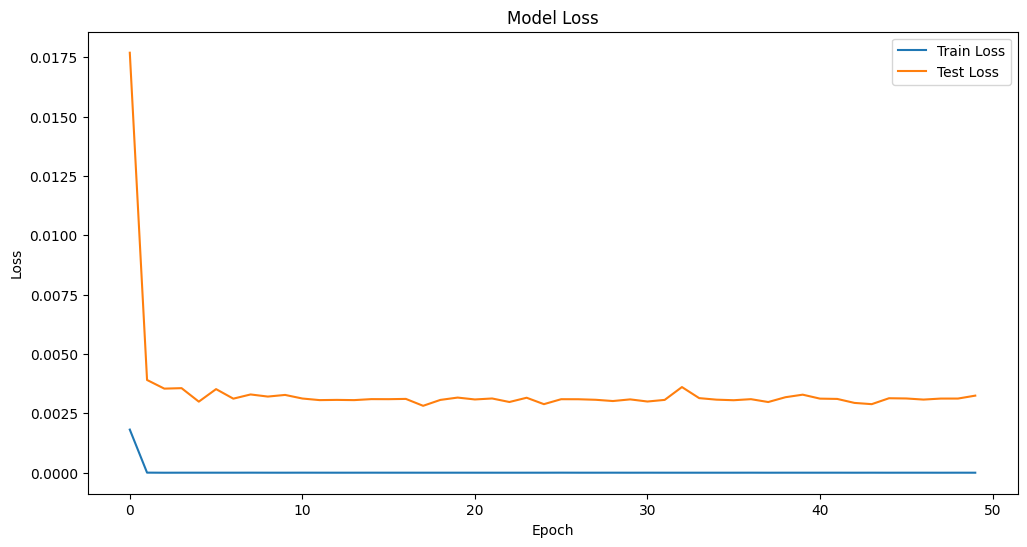

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Save the model
model.save('ANN_model.h5')

# Load the model (if needed later)
from tensorflow.keras.models import load_model
dbn = load_model('ANN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
